# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Sat, 02 Mar 2024   Prob (F-statistic):           6.69e-34
Time:                        01:08:30   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

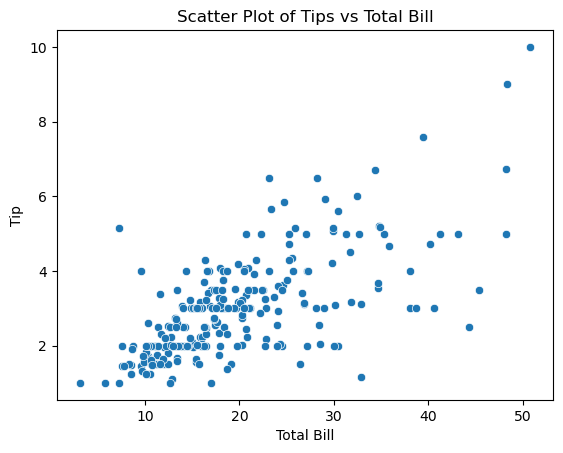

In [1]:
# Importar pacotes
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Carregar a base de gorjetas (usando o conjunto de dados 'tips' do Seaborn)
tips = sns.load_dataset("tips")

# Criar variáveis
X = sm.add_constant(tips['total_bill'])  # Adicionar a constante para a regressão linear
y = tips['tip']

# Realizar a regressão linear
model = sm.OLS(y, X).fit()

# Imprimir os resultados da regressão
print(model.summary())

# Criar o gráfico de dispersão
sns.scatterplot(x='total_bill', y='tip', data=tips)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Scatter Plot of Tips vs Total Bill')
plt.show()


### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     31.34
Date:                Sat, 02 Mar 2024   Prob (F-statistic):           5.85e-08
Time:                        01:08:50   Log-Likelihood:                -772.37
No. Observations:                 244   AIC:                             1549.
Df Residuals:                     242   BIC:                             1556.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.6766      0.900     22.975      0.0

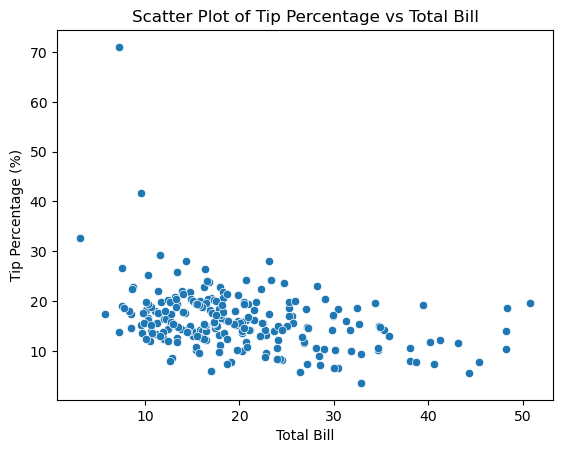

In [2]:
# Criar a variável tip_pct
tips['tip_pct'] = tips['tip'] / tips['total_bill'] * 100

# Criar variáveis
X_pct = sm.add_constant(tips['total_bill'])
y_pct = tips['tip_pct']

# Realizar a regressão linear
model_pct = sm.OLS(y_pct, X_pct).fit()

# Imprimir os resultados da regressão
print(model_pct.summary())

# Criar o gráfico de dispersão
sns.scatterplot(x='total_bill', y='tip_pct', data=tips)
plt.xlabel('Total Bill')
plt.ylabel('Tip Percentage (%)')
plt.title('Scatter Plot of Tip Percentage vs Total Bill')
plt.show()


### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

##### Cada modelo oferece insights distintos sobre a relação entre gorjeta e conta total, sendo mais apropriado interpretar os R² dentro do contexto de cada modelo. A escolha entre os modelos dependerá do aspecto específico da relação que está sendo investigado (valor absoluto da gorjeta ou sua porcentagem em relação à conta total).

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [3]:
# Ajustar o modelo de regressão de tip_pct por total_bill
model_tip_pct = sm.OLS(y_pct, X_pct).fit()

# Obter os valores preditos para tip_pct
pred_tip_pct = model_tip_pct.fittedvalues

# Calcular os valores preditos para tip usando tip_pct * total_bill
pred_tip = pred_tip_pct * tips['total_bill']

# Calcular o R² para o modelo de tip
r_squared_tip = sm.OLS(y, sm.add_constant(pred_tip)).fit().rsquared

# Comparar R² com o modelo anterior (item 1)
print(f"R² do modelo de tip (item 3): {r_squared_tip}")
print(f"R² do modelo de tip (item 1): {model.rsquared}")


R² do modelo de tip (item 3): 0.41815685816619275
R² do modelo de tip (item 1): 0.45661658635167646
